   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

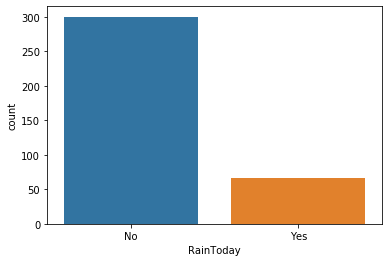

In [36]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#enter dataset
dataset = pd.read_csv("weather.csv")
print(dataset.head(5))
print(dataset.shape)

# drop or delete the unnecessary columns in the data. 
clean_data_1 = dataset.drop(['Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am',
                             'Pressure9am','Temp9am','Temp3pm','RISK_MM','RainTomorrow','WindSpeed3pm'], axis = 1) 


clean_data_1["AvgHum"] = clean_data_1[['Humidity3pm','Humidity9am']].mean(axis=1)
clean_data_1["Cloud_cover"] = clean_data_1[['Cloud9am','Cloud3pm']].mean(axis=1)

clean_data_1.loc[clean_data_1['AvgHum'] < 45, 'AvgHum'] = 0
clean_data_1.loc[clean_data_1['AvgHum'] > 45, 'AvgHum'] = 1
clean_data_1.loc[clean_data_1['AvgHum'] == 45, 'AvgHum'] = 1

print(clean_data_1)
clean_data_1.to_csv('multi_test.csv')

#Analyzing Data
sns.countplot(x="RainToday", data=clean_data_1)

# statistical parameters
stats = clean_data_1.describe()
print(stats)

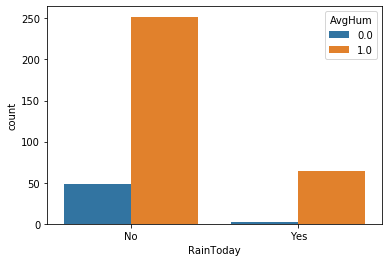

In [20]:
sns.countplot(x='RainToday', hue = 'AvgHum', data = clean_data_1)

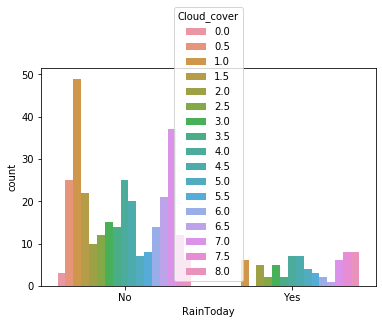

In [21]:
sns.countplot(x='RainToday', hue='Cloud_cover', data = clean_data_1)

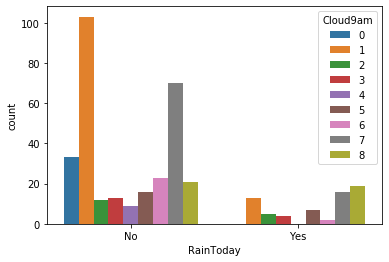

In [22]:
sns.countplot(x='RainToday', hue='Cloud9am', data = clean_data_1)

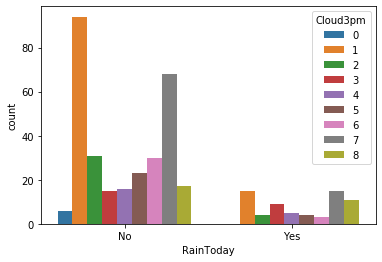

In [23]:
sns.countplot(x='RainToday', hue='Cloud3pm', data = clean_data_1)

In [24]:
clean_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
MinTemp        366 non-null float64
MaxTemp        366 non-null float64
Rainfall       366 non-null float64
Evaporation    366 non-null float64
Humidity9am    366 non-null int64
Humidity3pm    366 non-null int64
Pressure3pm    366 non-null float64
Cloud9am       366 non-null int64
Cloud3pm       366 non-null int64
RainToday      366 non-null object
AvgHum         366 non-null float64
Cloud_cover    366 non-null float64
dtypes: float64(7), int64(4), object(1)
memory usage: 34.4+ KB


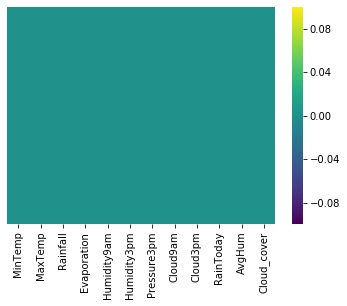

In [25]:
sns.heatmap(clean_data_1.isnull(), yticklabels=False, cmap="viridis")

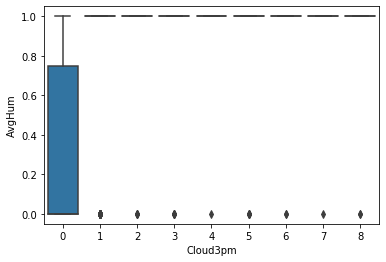

In [26]:
sns.boxplot(x="Cloud3pm", y="AvgHum", data=clean_data_1)

In [27]:
clean_data_1.isnull().sum()

MinTemp        0
MaxTemp        0
Rainfall       0
Evaporation    0
Humidity9am    0
Humidity3pm    0
Pressure3pm    0
Cloud9am       0
Cloud3pm       0
RainToday      0
AvgHum         0
Cloud_cover    0
dtype: int64

In [28]:
RainToday1 = pd.get_dummies(clean_data_1['RainToday'], drop_first=True)
RainToday1.head(6)

,Yes
0,0
1,1
2,1
3,1
4,1
5,0


In [29]:
AvgHum1 = pd.get_dummies(clean_data_1['AvgHum'], drop_first=True)
AvgHum1.head(6)

,1.0
0,1
1,1
2,1
3,1
4,1
5,1


In [30]:
Cloud_cover1 = pd.get_dummies(clean_data_1['Cloud_cover'], drop_first=True)
Cloud_cover1.head(6)

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [31]:
clean_data_1 = pd.concat([clean_data_1,RainToday1,Cloud_cover1,AvgHum1],axis=1)

clean_data_1.drop('RainToday',axis=1,inplace=True)
clean_data_1.head(5)
clean_data_1.to_csv('multi_test_123.csv')

In [32]:
X = clean_data_1.drop("Yes",axis=1)
Y = clean_data_1["Yes"]


In [33]:
#logistic regression
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=15)
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

# prediction
prediction = logmodel.predict(X_test) 
class_report = classification_report(Y_test,prediction)
con_mat = confusion_matrix(Y_test,prediction)
print(class_report)
print(con_mat)
print(prediction)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        87
           1       1.00      0.91      0.95        23

    accuracy                           0.98       110
   macro avg       0.99      0.96      0.97       110
weighted avg       0.98      0.98      0.98       110

[[87  0]
 [ 2 21]]
[0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0]


C:\Users\DEEP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
from sklearn.metrics import accuracy_score
final_ans = accuracy_score(Y_test,prediction) * 100
print(final_ans)

98.18181818181819


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.01331747 0.00269502 1.         0.00230579 0.01222239 0.9983708
 0.00668    0.02028318 0.00438058 0.00371385 0.0061326  0.001258
 0.00758711 1.         0.00684612 0.01103339 0.0062488  0.0094322
 0.01236763 0.0023678  0.00419133 0.24420978 0.00321781 0.00763163
 0.01059427 0.00281472 0.00731032 0.00145301 0.05606687 0.01174898
 0.99964985 0.0104199  0.00141109 0.99999991 0.00156719 0.02624887
 0.00448281 0.02650084 0.01742924 0.00311781 0.48312757 0.00948331
 0.00514426 0.18840154 0.00447353 0.00382036 0.01528483 0.99413887
 0.00801487 0.0061607  0.88939532 0.00349149 0.01179611 0.00154642
 0.00556187 0.00556718 0.00849421 0.01620427 0.01223115 0.07093037
 0.

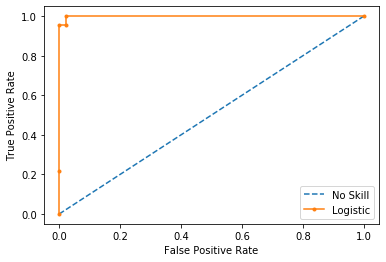

In [35]:
#ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#probabilities
ns_probs = [0 for _ in range(len(Y_test))]
lr_probs = logmodel.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
print(ns_probs)
print(lr_probs)

ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)

print(ns_auc)
print(lr_auc)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()